In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


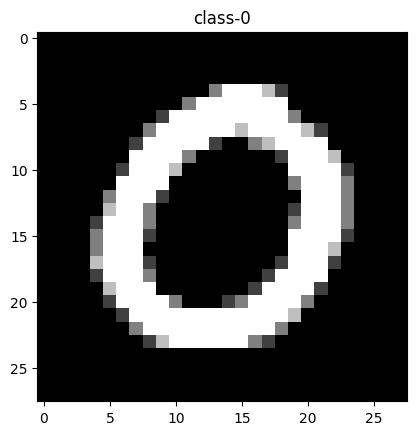

Train image 42759-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 191
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  64 255 255 255 255 255 255 255 255
  255 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 191 255 255
  255 255 191  64   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 2

In [3]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
# rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
def select_random_samples(matrix, labels, num_samples_per_label):
    selected_samples = []
    selected_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        selected_indices = np.random.choice(indices, size=num_samples_per_label, replace=False)
        selected_samples.extend(matrix[selected_indices])
        selected_labels.extend(labels[selected_indices])

    selected_samples = np.array(selected_samples)
    selected_labels = np.array(selected_labels)

    return selected_samples, selected_labels

# Assuming your matrices are named `data` and `labels`
# data = np.random.random((60000, 28, 28))  # Example random data
data = train_images  # Example random data
labels = train_labels  # Example random labels
# labels = np.random.randint(0, 10, 60000)  # Example random labels

num_samples_per_label = 600
selected_data, selected_labels = select_random_samples(data, labels, num_samples_per_label)

print("Shape of selected data:", selected_data.shape)
print("Shape of selected labels:", selected_labels.shape)


Shape of selected data: (6000, 28, 28)
Shape of selected labels: (6000,)


In [6]:
def select_random_samples(matrix, labels, num_samples_per_label):
    selected_samples = []
    selected_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        selected_indices = np.random.choice(indices, size=num_samples_per_label, replace=False)
        selected_samples.extend(matrix[selected_indices])
        selected_labels.extend(labels[selected_indices])

    selected_samples = np.array(selected_samples)
    selected_labels = np.array(selected_labels)

    return selected_samples, selected_labels

# Assuming your matrices are named `data` and `labels`
data = train_images    # Example random data
labels = train_labels  # Example random labels

num_samples_per_label = 600
selected_data, selected_labels = select_random_samples(data, labels, num_samples_per_label)

# Shuffle both data and labels in the same order
shuffle_indices = np.random.permutation(selected_data.shape[0])
shuffled_data = selected_data[shuffle_indices]
shuffled_labels = selected_labels[shuffle_indices]

print("Shape of shuffled data:", shuffled_data.shape)
print("Shape of shuffled labels:", shuffled_labels.shape)


Shape of shuffled data: (6000, 28, 28)
Shape of shuffled labels: (6000,)


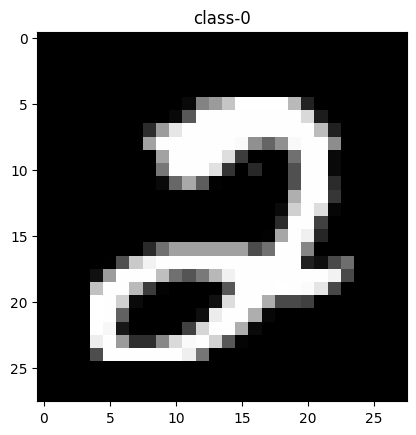

In [7]:

plt.imshow(shuffled_data[0], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

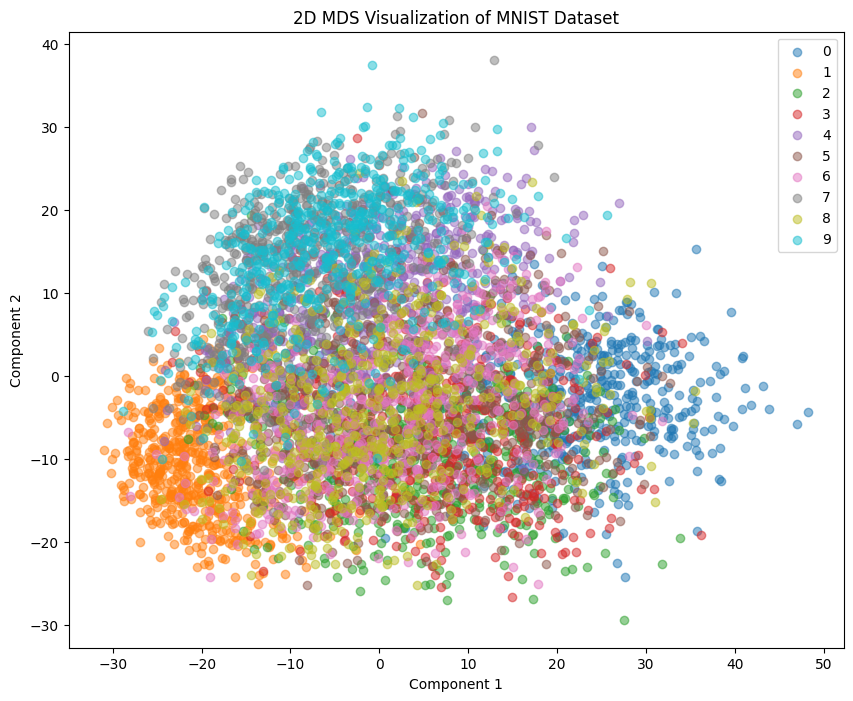

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    """Compute the Euclidean distance between two points"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def pairwise_distances(X):
    """Compute pairwise distances between all points in the dataset"""
    n = X.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = euclidean_distance(X[i], X[j])
            distances[j, i] = distances[i, j]  # Since distance is symmetric
    return distances

def mds(distances, n_components=2):
    """Multi-dimensional Scaling (MDS)"""
    n = distances.shape[0]
    
    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n
    
    # Double centering
    B = -0.5 * (H @ distances**2 @ H)
    
    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select top eigenvalues and eigenvectors
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]
    
    # Compute the final embedding
    X_embedded = eigenvectors * np.sqrt(eigenvalues)
    
    return X_embedded

# Load MNIST dataset
dataset_path = '/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_1/' # Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

# Sample 600 points from each class
num_samples_per_class = 600
sampled_indices = []
for i in range(10):  # Assuming you have 10 classes
    class_indices = np.where(train_labels == i)[0]
    sampled_indices.extend(np.random.choice(class_indices, num_samples_per_class, replace=False))

# Use the sampled indices to get the sampled images and labels
train_images_sampled = train_images[sampled_indices]
train_labels_sampled = train_labels[sampled_indices]

# Flatten the sampled images to 1D arrays
train_images_sampled_flat = train_images_sampled.reshape(train_images_sampled.shape[0], -1)

# Compute the pairwise Euclidean distances between all sampled samples
distance_matrix = pairwise_distances(train_images_sampled_flat)

# Apply MDS to reduce dimensionality to 2D
X_2d = mds(distance_matrix)

# Visualize the results
plt.figure(figsize=(10, 8))
for i in range(10):  # Assuming you have 10 classes
    class_indices = np.where(train_labels_sampled == i)[0]
    plt.scatter(X_2d[class_indices, 0], X_2d[class_indices, 1], label=str(i), alpha=0.5)
plt.title('2D MDS Visualization of MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_pairwise_distances(data):
    n = data.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = np.linalg.norm(data[i] - data[j]) 
    return distances

def center_distances(distances):
    n = distances.shape[0]
    total_sum = np.sum(distances)
    row_means = np.sum(distances, axis=0) / (n - 1)
    col_means = np.sum(distances, axis=1) / (n - 1)
    grand_mean = np.sum(row_means) / n
    centered_distances = np.zeros_like(distances)
    for i in range(n):
        for j in range(n):
            centered_distances[i, j] = distances[i, j] - row_means[j] - col_means[i] + grand_mean
    return centered_distances

def mds(data, n_components=2):
    pairwise_distances = compute_pairwise_distances(data)
    centered_distances = center_distances(pairwise_distances)
    eigen_values, eigen_vectors = np.linalg.eigh(centered_distances)
    idx = np.argsort(eigen_values)[::-1][:n_components]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    eigen_values[eigen_values < 0] = 0  # ensure non-negative eigenvalues
    sqrt_eigen_values = np.sqrt(eigen_values)
    transformed_data = eigen_vectors @ np.diag(sqrt_eigen_values)
    return transformed_data

# Assuming your matrices are named `data` and `labels`
data = shuffled_data.reshape(shuffled_data.shape[0], -1) # Example random data
labels = shuffled_labels  # Example random labels

# Apply MDS
mds_data = mds(data, n_components=2)

# Plot MDS visualization
plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    plt.scatter(mds_data[labels == label, 0], mds_data[labels == label, 1], label=label, alpha=1, color=colors[i])
plt.title('MDS Visualization of Handwritten Digit Dataset')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend()
plt.show()


NameError: name 'colors' is not defined

<Figure size 1000x800 with 0 Axes>

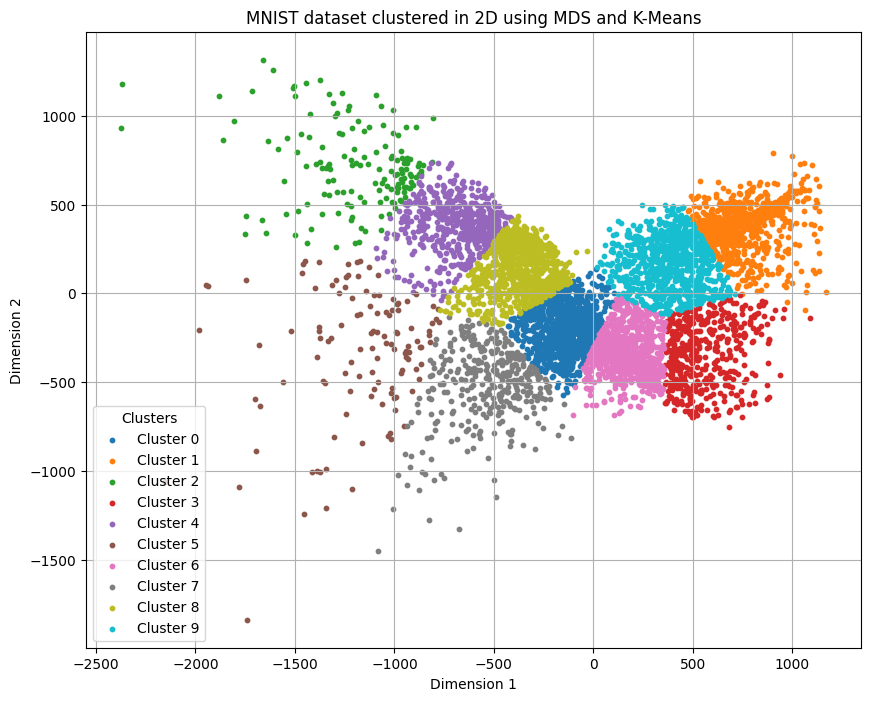

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data = shuffled_data.reshape(shuffled_data.shape[0], -1)
labels=shuffled_labels

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Define the dataset
# Assuming you have a 6000x784 array named 'data'
# Assuming you have a 6000-sized array of labels named 'labels'

# Step 2: Compute pairwise Euclidean distances
def euclidean_distance_matrix(X):
    n = X.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distances[i, j] = np.linalg.norm(X[i] - X[j])
            distances[j, i] = distances[i, j]
    return distances

distance_matrix = euclidean_distance_matrix(data)

# Step 3: Implement classical MDS algorithm
def classical_MDS(D, d):
    n = D.shape[0]
    J = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * J @ (D ** 2) @ J
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    W_d = np.diag(np.sqrt(eigenvalues[:d]))
    V_d = eigenvectors[:, :d]
    X_projected = V_d @ W_d
    return X_projected

# Project the data into two dimensions
X_projected = classical_MDS(distance_matrix, d=2)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_projected)

# Step 5: Visualize the projected data with clusters
plt.figure(figsize=(10, 8))
for i in range(10):
    indices = np.where(clusters == i)[0]
    plt.scatter(X_projected[indices, 0], X_projected[indices, 1], label='Cluster ' + str(i), s=10)
plt.title('MNIST dataset clustered in 2D using MDS and K-Means')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()
